# SARANDA PODDAR

# TSF GRIP FEB21

# TASK 7

# DATA SCIENCE AND BUSINESS ANALYTICS

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
info = pd.read_csv(r'C:\Users\saran\Documents\datasets\yahoo_stock.csv')

In [20]:
info.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


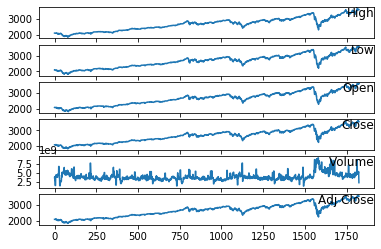

In [23]:
values = info.values
# specify columns to plot
groups = [1, 2, 3, 4, 5, 6]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(info.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [24]:
info.index = pd.DatetimeIndex(info.Date, freq='D')
info=info.drop(columns='Date')
info.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [25]:
#checking if there are any null values 
info.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

## VISUALISATION

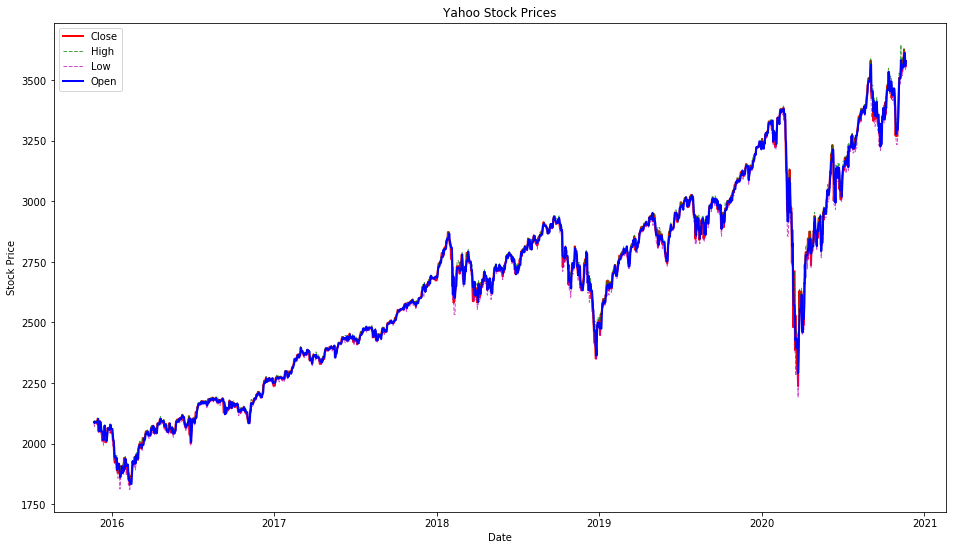

In [26]:
df = info
plt.figure(figsize=(16,9))

plt.plot(df.index, df.Close, lw=2, color='r',label='Close')
plt.plot(df.index, df.High, lw=1, color='g',linestyle='--',alpha=0.7,label='High')
plt.plot(df.index, df.Low, lw=1, color='m',linestyle='--',alpha=0.7,label='Low')
plt.plot(df.index, df.Open, lw=2, color='b',label='Open')

plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Yahoo Stock Prices')
plt.show()

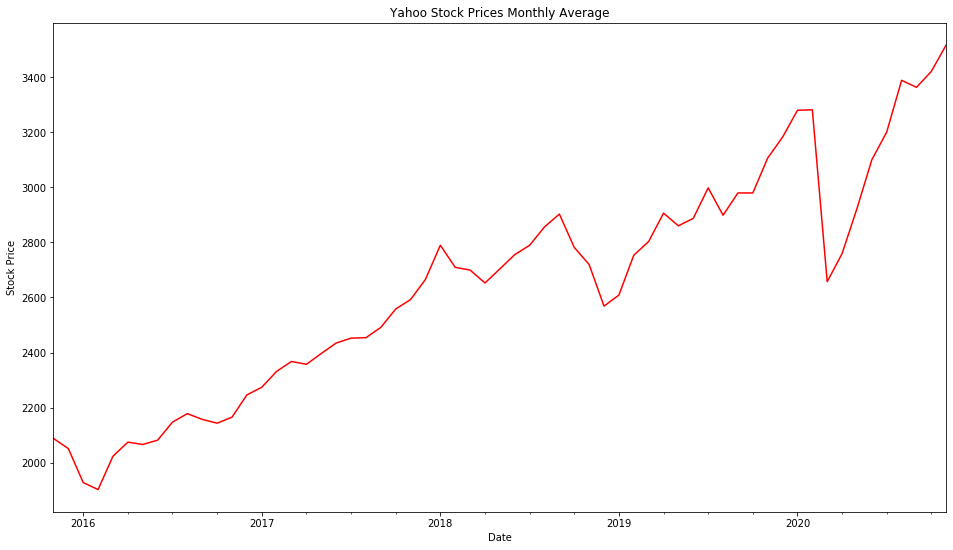

In [35]:
#TAKING CLOSE PRICES TO CALCULATE AVERAGE PRICES

df_close_month_avg = df['Close'].resample('MS').mean()

plt.figure(figsize=(16,9))

df_close_month_avg.plot(color='r')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Yahoo Stock Prices Monthly Average')

plt.show()

In [170]:
df1 = df.reset_index()['Close']
df1

0       2086.590088
1       2089.139893
2       2088.870117
3       2088.870117
4       2090.110107
           ...     
1820    3626.909912
1821    3609.530029
1822    3567.790039
1823    3581.870117
1824    3557.540039
Name: Close, Length: 1825, dtype: float64

In [175]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [176]:
df1

array([[0.16538122],
       [0.16701879],
       [0.16684553],
       ...,
       [0.75781444],
       [0.78619463],
       [0.81641168]])

In [44]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [47]:
print(training_size,test_size)
print(train_data)

1460 365
[[0.14323386]
 [0.14465213]
 [0.14450208]
 ...
 [0.71814354]
 [0.71162459]
 [0.708888  ]]


In [48]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY) 

In [49]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [51]:
print(X_train.shape)
print(y_train.shape)

(1359, 100)
(1359,)


In [53]:
print(X_test.shape)
print(ytest.shape)

(264, 100)
(264,)


In [54]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## MAKING MODEL

THE FOLLOWING MODEL PREDICTS STOCK PRICES ONLY ON THE NUMERICAL ANALYIS(CLOSING PRICES)
*NUMERICAL ANALYIS ALONG WITH SENTIMENT ANALYSIS DONE LATER

In [55]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [57]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 3s 152ms/step - loss: 2.8306e-04 - val_loss: 0.0025
Epoch 2/100
22/22 [==============================] - 3s 144ms/step - loss: 2.7475e-04 - val_loss: 0.0026
Epoch 3/100
22/22 [==============================] - 3s 147ms/step - loss: 2.7950e-04 - val_loss: 0.0025
Epoch 4/100
22/22 [==============================] - 3s 153ms/step - loss: 2.8880e-04 - val_loss: 0.0022
Epoch 5/100
22/22 [==============================] - 3s 154ms/step - loss: 3.1922e-04 - val_loss: 0.0022
Epoch 6/100
22/22 [==============================] - 3s 147ms/step - loss: 2.8648e-04 - val_loss: 0.0022
Epoch 7/100
22/22 [==============================] - 3s 154ms/step - loss: 2.7155e-04 - val_loss: 0.0025
Epoch 8/100
22/22 [==============================] - 3s 153ms/step - loss: 2.6534e-04 - val_loss: 0.0022
Epoch 9/100
22/22 [==============================] - 3s 151ms/step - loss: 2.6337e-04 - val_loss: 0.0022
Epoch 10/100
22/22 [==============================] - 3

In [67]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [68]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [69]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2579.916543821264

In [70]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3134.5014342589884

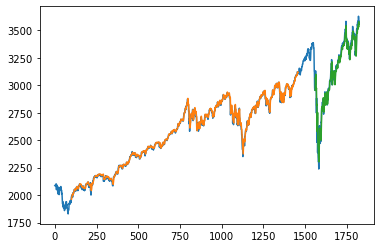

In [71]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [72]:
len(test_data)

365

In [84]:
x_input=test_data[244:].reshape(1,-1)
x_input.shape

(1, 121)

In [85]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [87]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps = 120
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.7712353  0.7712353  0.7712353  0.78446237 0.77279833 0.79504737
 0.78825031 0.80210042 0.80210042 0.80210042 0.81516617 0.8217852
 0.83361058 0.84550819 0.84668746 0.84668746 0.84668746 0.85179914
 0.83690339 0.86285699 0.85900781 0.85868529 0.85868529 0.85868529
 0.86376914 0.86810216 0.85979774 0.86572707 0.87220705 0.87220705
 0.87220705 0.89118555 0.89804943 0.91757845 0.92081572 0.93386477
 0.93386477 0.93386477 0.92958185 0.94423276 0.97437476 0.90441262
 0.88878261 0.88878261 0.88878261 0.88878261 0.83587445 0.87320828
 0.83996263 0.84095273 0.84095273 0.84095273 0.86463132 0.87445422
 0.86571593 0.84987462 0.82899387 0.82899387 0.82899387 0.80762927
 0.82682464 0.78307738 0.78845618 0.81730755 0.81730755 0.81730755
 0.84686549 0.83789349 0.85320641 0.86310726 0.84509659 0.84509659
 0.84509659 0.87857038 0.85207726 0.88459978 0.89983489 0.916694
 0.916694   0.916694   0.94844343 0.93604513 0.92310731 0.92014271
 0.92040412 0.92040412 0.92040412 0.88876034 0.897771

7 day input [0.80210042 0.80210042 0.80210042 0.81516617 0.8217852  0.83361058
 0.84550819 0.84668746 0.84668746 0.84668746 0.85179914 0.83690339
 0.86285699 0.85900781 0.85868529 0.85868529 0.85868529 0.86376914
 0.86810216 0.85979774 0.86572707 0.87220705 0.87220705 0.87220705
 0.89118555 0.89804943 0.91757845 0.92081572 0.93386477 0.93386477
 0.93386477 0.92958185 0.94423276 0.97437476 0.90441262 0.88878261
 0.88878261 0.88878261 0.88878261 0.83587445 0.87320828 0.83996263
 0.84095273 0.84095273 0.84095273 0.86463132 0.87445422 0.86571593
 0.84987462 0.82899387 0.82899387 0.82899387 0.80762927 0.82682464
 0.78307738 0.78845618 0.81730755 0.81730755 0.81730755 0.84686549
 0.83789349 0.85320641 0.86310726 0.84509659 0.84509659 0.84509659
 0.87857038 0.85207726 0.88459978 0.89983489 0.916694   0.916694
 0.916694   0.94844343 0.93604513 0.92310731 0.92014271 0.92040412
 0.92040412 0.92040412 0.88876034 0.89777131 0.89356621 0.90353931
 0.91015834 0.91015834 0.91015834 0.8743263  0.86860

13 day input [0.84550819 0.84668746 0.84668746 0.84668746 0.85179914 0.83690339
 0.86285699 0.85900781 0.85868529 0.85868529 0.85868529 0.86376914
 0.86810216 0.85979774 0.86572707 0.87220705 0.87220705 0.87220705
 0.89118555 0.89804943 0.91757845 0.92081572 0.93386477 0.93386477
 0.93386477 0.92958185 0.94423276 0.97437476 0.90441262 0.88878261
 0.88878261 0.88878261 0.88878261 0.83587445 0.87320828 0.83996263
 0.84095273 0.84095273 0.84095273 0.86463132 0.87445422 0.86571593
 0.84987462 0.82899387 0.82899387 0.82899387 0.80762927 0.82682464
 0.78307738 0.78845618 0.81730755 0.81730755 0.81730755 0.84686549
 0.83789349 0.85320641 0.86310726 0.84509659 0.84509659 0.84509659
 0.87857038 0.85207726 0.88459978 0.89983489 0.916694   0.916694
 0.916694   0.94844343 0.93604513 0.92310731 0.92014271 0.92040412
 0.92040412 0.92040412 0.88876034 0.89777131 0.89356621 0.90353931
 0.91015834 0.91015834 0.91015834 0.8743263  0.86860271 0.80205031
 0.82378767 0.80145511 0.80145511 0.80145511 0.8238

19 day output [[0.8094491]]
20 day input [0.85900781 0.85868529 0.85868529 0.85868529 0.86376914 0.86810216
 0.85979774 0.86572707 0.87220705 0.87220705 0.87220705 0.89118555
 0.89804943 0.91757845 0.92081572 0.93386477 0.93386477 0.93386477
 0.92958185 0.94423276 0.97437476 0.90441262 0.88878261 0.88878261
 0.88878261 0.88878261 0.83587445 0.87320828 0.83996263 0.84095273
 0.84095273 0.84095273 0.86463132 0.87445422 0.86571593 0.84987462
 0.82899387 0.82899387 0.82899387 0.80762927 0.82682464 0.78307738
 0.78845618 0.81730755 0.81730755 0.81730755 0.84686549 0.83789349
 0.85320641 0.86310726 0.84509659 0.84509659 0.84509659 0.87857038
 0.85207726 0.88459978 0.89983489 0.916694   0.916694   0.916694
 0.94844343 0.93604513 0.92310731 0.92014271 0.92040412 0.92040412
 0.92040412 0.88876034 0.89777131 0.89356621 0.90353931 0.91015834
 0.91015834 0.91015834 0.8743263  0.86860271 0.80205031 0.82378767
 0.80145511 0.80145511 0.80145511 0.82385991 0.85663271 0.89794921
 0.93522193 0.93466013 

26 day output [[0.78747773]]
27 day input [0.86572707 0.87220705 0.87220705 0.87220705 0.89118555 0.89804943
 0.91757845 0.92081572 0.93386477 0.93386477 0.93386477 0.92958185
 0.94423276 0.97437476 0.90441262 0.88878261 0.88878261 0.88878261
 0.88878261 0.83587445 0.87320828 0.83996263 0.84095273 0.84095273
 0.84095273 0.86463132 0.87445422 0.86571593 0.84987462 0.82899387
 0.82899387 0.82899387 0.80762927 0.82682464 0.78307738 0.78845618
 0.81730755 0.81730755 0.81730755 0.84686549 0.83789349 0.85320641
 0.86310726 0.84509659 0.84509659 0.84509659 0.87857038 0.85207726
 0.88459978 0.89983489 0.916694   0.916694   0.916694   0.94844343
 0.93604513 0.92310731 0.92014271 0.92040412 0.92040412 0.92040412
 0.88876034 0.89777131 0.89356621 0.90353931 0.91015834 0.91015834
 0.91015834 0.8743263  0.86860271 0.80205031 0.82378767 0.80145511
 0.80145511 0.80145511 0.82385991 0.85663271 0.89794921 0.93522193
 0.93466013 0.93466013 0.93466013 0.95749881 0.95473438 0.96982473
 0.94999533 0.976771

In [88]:
day_new=np.arange(1, 121)
day_pred=np.arange(121, 151) 

In [89]:
len(df1)

1825

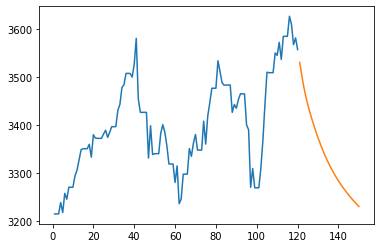

In [90]:
plt.plot(day_new,scaler.inverse_transform(df1[1705:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

## TEXTUAL ANALYSIS

In [2]:
import pandas as pd
a = pd.read_csv(r'C:\Users\saran\Documents\datasets\india-news-headlines.csv')
a

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [3]:
#cutting rows before 2015-11-23
df = a[a['publish_date'] >= 20151123] 
df

,publish_date,headline_category,headline_text
2231798,20151123,life-style.health-fitness.home-remedies,10 herbs to battle diabetes
2231799,20151123,life-style.health-fitness.health-news,8 things you should know about sleeping
2231800,20151123,entertainment.hindi.bollywood,Aamir Khan's tough training for 'PK'
2231801,20151123,unknown,Smt. Swarn Kanta Khanna
2231802,20151123,unknown,SMT. P. SOUDAMINI
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [8]:
cols = ['Date','Headlines']
news_df = df.drop('headline_category',axis=1)

In [9]:
#Converting data type of Date column 
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'],format= '%Y%m%d')
news_df

,publish_date,headline_text
2231798,2015-11-23,10 herbs to battle diabetes
2231799,2015-11-23,8 things you should know about sleeping
2231800,2015-11-23,Aamir Khan's tough training for 'PK'
2231801,2015-11-23,Smt. Swarn Kanta Khanna
2231802,2015-11-23,SMT. P. SOUDAMINI
...,...,...
3297167,2020-06-30,why tiktok removed 1 65 crore videos in india
3297168,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297169,2020-06-30,kangana ranaut gets a doll version of herself ...
3297170,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [10]:
news_df['headline_text'] = news_df.groupby(['publish_date']).transform(lambda x : ' '.join(x))  
news = news_df.drop_duplicates() 
news.reset_index(inplace = True, drop = True)
news

,publish_date,headline_text
0,2015-11-23,10 herbs to battle diabetes 8 things you shoul...
1,2015-11-24,UEFA Champions League: Maccavi Tel-Aviv vs Che...
2,2015-11-25,Hot Bollywood actresses who gained weight for ...
3,2015-11-26,Tips to curb anger on the road How to strength...
4,2015-11-27,Home decor essentials before you turn 30 5 bea...
...,...,...
1677,2020-06-26,Containment zone residents slam high prices ch...
1678,2020-06-27,like me i wont let you have a toxic relationsh...
1679,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
1680,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
c = []
ps = nltk.PorterStemmer()

for i in range(0,len(news['headline_text'])): 
    one_news = re.sub('[^a-zA-Z]',' ',news['headline_text'][i])
    one_news = one_news.lower()
    one_news = one_news.split()
    one_news = [ps.stem(word) for word in one_news if not word in set(stopwords.words('english'))]
    one_news=' '.join(one_news)
    c.append(one_news)

In [12]:
news['compound']=''
news['negative']=''
news['neutral']=''
news['positive']=''

C:\Users\saran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\saran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\saran\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [14]:
pip install SentimentIntensityAnalyzer

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement SentimentIntensityAnalyzer
ERROR: No matching distribution found for SentimentIntensityAnalyzer
You should consider upgrading via the 'C:\Users\saran\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [17]:
 nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saran\AppData\Roaming\nltk_data...


True

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

#Sentiment Analyzer
sid = SentimentIntensityAnalyzer()
print('Start calculating sentiment scores:')

news['compound'] = news['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
print('Compound Done')
news['negative'] = news['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
print('Negative Done')
news['neutral'] = news['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
print('Neutral Done')
news['positive'] = news['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])
print('Positive Done')
print('Stop')

news.head()

Start calculating sentiment scores:


C:\Users\saran\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Compound Done


C:\Users\saran\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Negative Done


C:\Users\saran\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Neutral Done
Positive Done
Stop


C:\Users\saran\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,publish_date,headline_text,compound,negative,neutral,positive
0,2015-11-23,10 herbs to battle diabetes 8 things you shoul...,-0.9988,0.137,0.737,0.125
1,2015-11-24,UEFA Champions League: Maccavi Tel-Aviv vs Che...,-1.0000,0.171,0.735,0.094
2,2015-11-25,Hot Bollywood actresses who gained weight for ...,-0.9999,0.163,0.728,0.110
3,2015-11-26,Tips to curb anger on the road How to strength...,-0.9999,0.156,0.732,0.111
4,2015-11-27,Home decor essentials before you turn 30 5 bea...,-0.9999,0.153,0.752,0.095


In [171]:
df1.shape

(1825,)

In [44]:
news.shape

(1682, 6)

In [77]:
close = df.reset_index()['Close']

In [78]:
close['Close'] = pd.DataFrame(close)

In [86]:
fin = pd.concat([close, news], axis=1) 

In [87]:
fin=fin[:1682]

In [121]:
fin

,Close,publish_date,headline_text,compound,negative,neutral,positive
0,2086.59,2015-11-23,10 herbs to battle diabetes 8 things you shoul...,-0.9988,0.137,0.737,0.125
1,2089.14,2015-11-24,UEFA Champions League: Maccavi Tel-Aviv vs Che...,-1.0000,0.171,0.735,0.094
2,2088.87,2015-11-25,Hot Bollywood actresses who gained weight for ...,-0.9999,0.163,0.728,0.110
3,2088.87,2015-11-26,Tips to curb anger on the road How to strength...,-0.9999,0.156,0.732,0.111
4,2090.11,2015-11-27,Home decor essentials before you turn 30 5 bea...,-0.9999,0.153,0.752,0.095
...,...,...,...,...,...,...,...
1677,3009.05,2020-06-26,Containment zone residents slam high prices ch...,-0.9999,0.163,0.748,0.089
1678,3009.05,2020-06-27,like me i wont let you have a toxic relationsh...,-0.9999,0.159,0.749,0.092
1679,3009.05,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,-0.9999,0.151,0.774,0.075
1680,3053.24,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,-0.9999,0.144,0.770,0.086


In [177]:
df1 = df1[:1682]
df1 = pd.DataFrame(df1)

In [178]:
fin2 = df1
fin3 = pd.concat([fin['compound'],fin['negative'], fin['neutral'], fin['positive']], axis=1)
fin3

,compound,negative,neutral,positive
0,-0.9988,0.137,0.737,0.125
1,-1.0000,0.171,0.735,0.094
2,-0.9999,0.163,0.728,0.110
3,-0.9999,0.156,0.732,0.111
4,-0.9999,0.153,0.752,0.095
...,...,...,...,...
1677,-0.9999,0.163,0.748,0.089
1678,-0.9999,0.159,0.749,0.092
1679,-0.9999,0.151,0.774,0.075
1680,-0.9999,0.144,0.770,0.086


In [186]:
df1

,0
0,0.165381
1,0.167019
2,0.166846
3,0.166846
4,0.167642
...,...
1677,0.757814
1678,0.757814
1679,0.757814
1680,0.786195


In [187]:
X = fin3
y = df1

In [188]:
print(X.shape,y.shape)

(1682, 4) (1682, 1)


In [189]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\saran\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [152]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\saran\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 0)
x_train.shape

(1429, 4)

In [192]:
x_train.head()

,compound,negative,neutral,positive
1290,-0.9999,0.164,0.742,0.094
1484,-1.0000,0.198,0.716,0.085
1078,-0.9993,0.128,0.760,0.113
638,-0.9999,0.146,0.749,0.105
999,-0.9999,0.154,0.730,0.116


In [193]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

C:\Users\saran\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saran\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [153]:
from sklearn.metrics import mean_squared_error
import xgboost 
import lightgbm

In [194]:
print(prediction[:10])
print(y_test[:10])
print(mean_squared_error(prediction,y_test))

[0.48502383 0.42036072 0.71221148 0.14114462 0.62907902 0.66192981
 0.29518844 0.28111394 0.2963273  0.59859578]
             0
1018  0.673682
946   0.574143
597   0.394440
575   0.390445
516   0.333710
191   0.173563
443   0.299017
987   0.655924
542   0.344647
801   0.637672
0.050972215560223216


In [195]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [196]:
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.04515478935786507


In [197]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [198]:
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions,y_test))

0.059132304193662444
